In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
int_airline_passengers = pd.read_csv('D:/Учеба/16. Временные ряды/1. Знакомство с временными рядами/international-airline-passengers.csv')
monthly_car_in_quebec = pd.read_csv('D:/Учеба/16. Временные ряды/1. Знакомство с временными рядами/monthly-car-sales-in-quebec-1960.csv')
monthly_sales_of_company_x = pd.read_csv('D:/Учеба/16. Временные ряды/1. Знакомство с временными рядами/monthly-sales-of-company-x-jan-6.csv')

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [5]:
int_airline_passengers = int_airline_passengers.dropna()

In [56]:
series1 = int_airline_passengers['Count']
series2 = monthly_car_in_quebec['Count']
series3 = monthly_sales_of_company_x['Count']

In [19]:
#Проведем анализ временных рядов

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


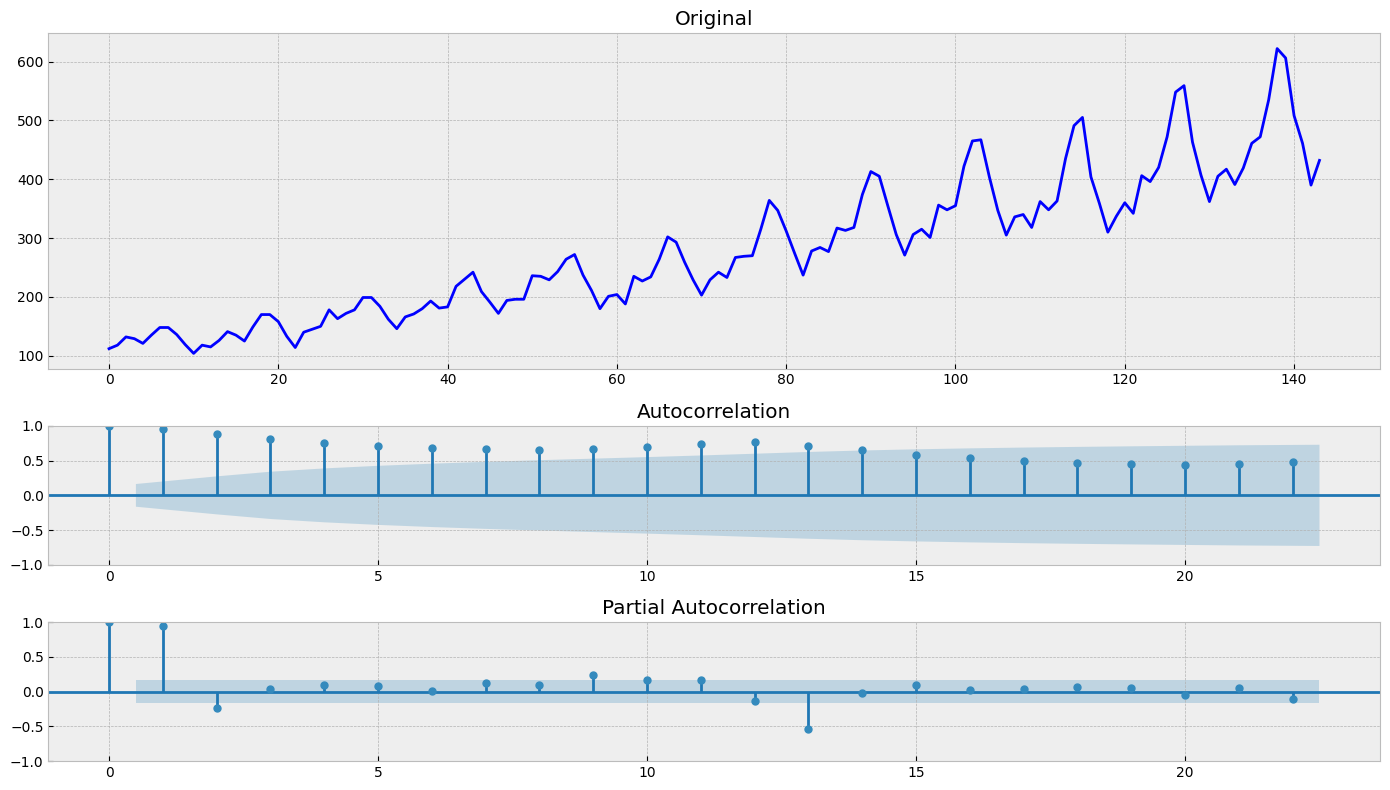

In [20]:
tsplot(series1) #Проведем исследования количества авиапассажиров 

In [21]:
#Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда.
#Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [22]:
#используем функцию Box-Cox, которая преобразует данные таким образом, чтобы они следовали нормальному распределению.
series1 = boxcox(series1, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


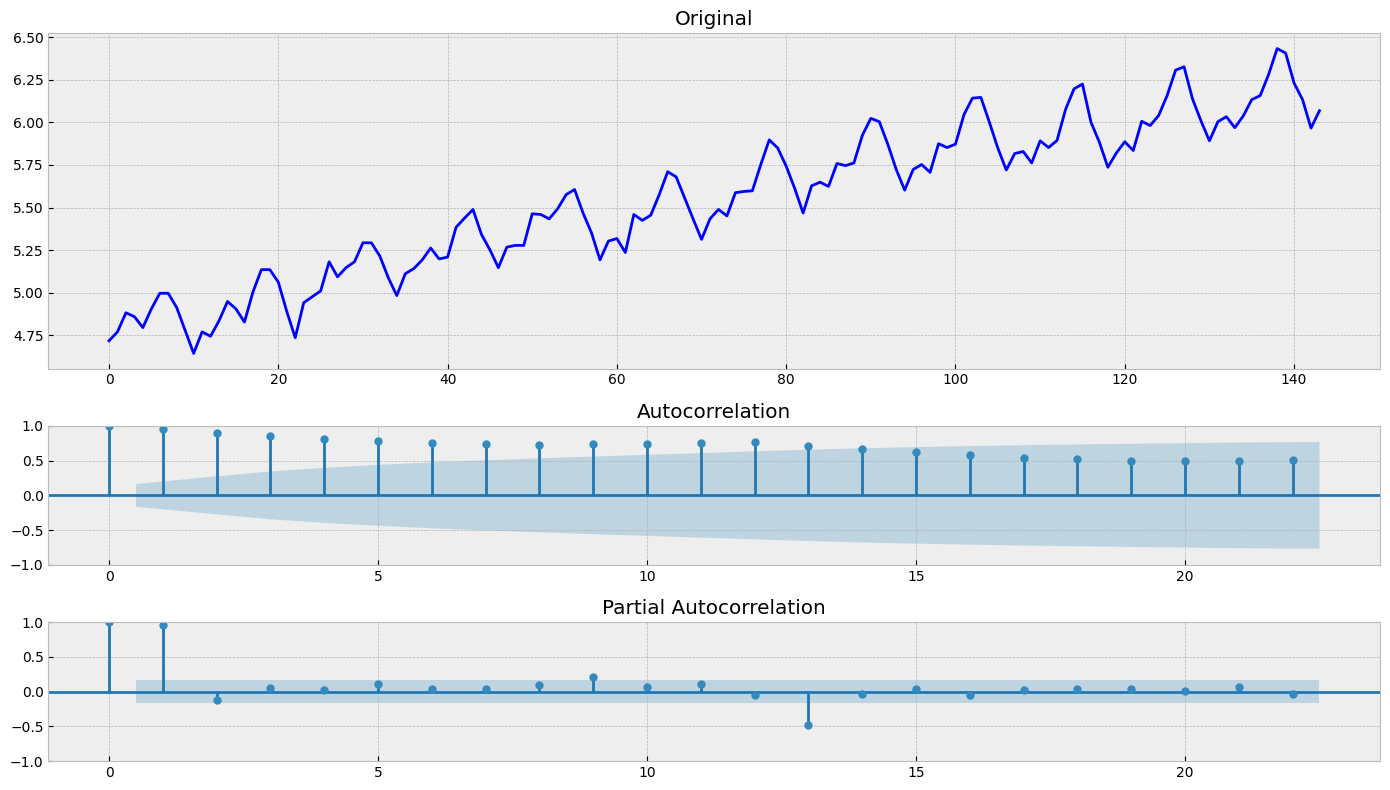

In [23]:
tsplot(series1)

In [24]:
#Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда.
#По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [25]:
series1 = np.diff(series1, 1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


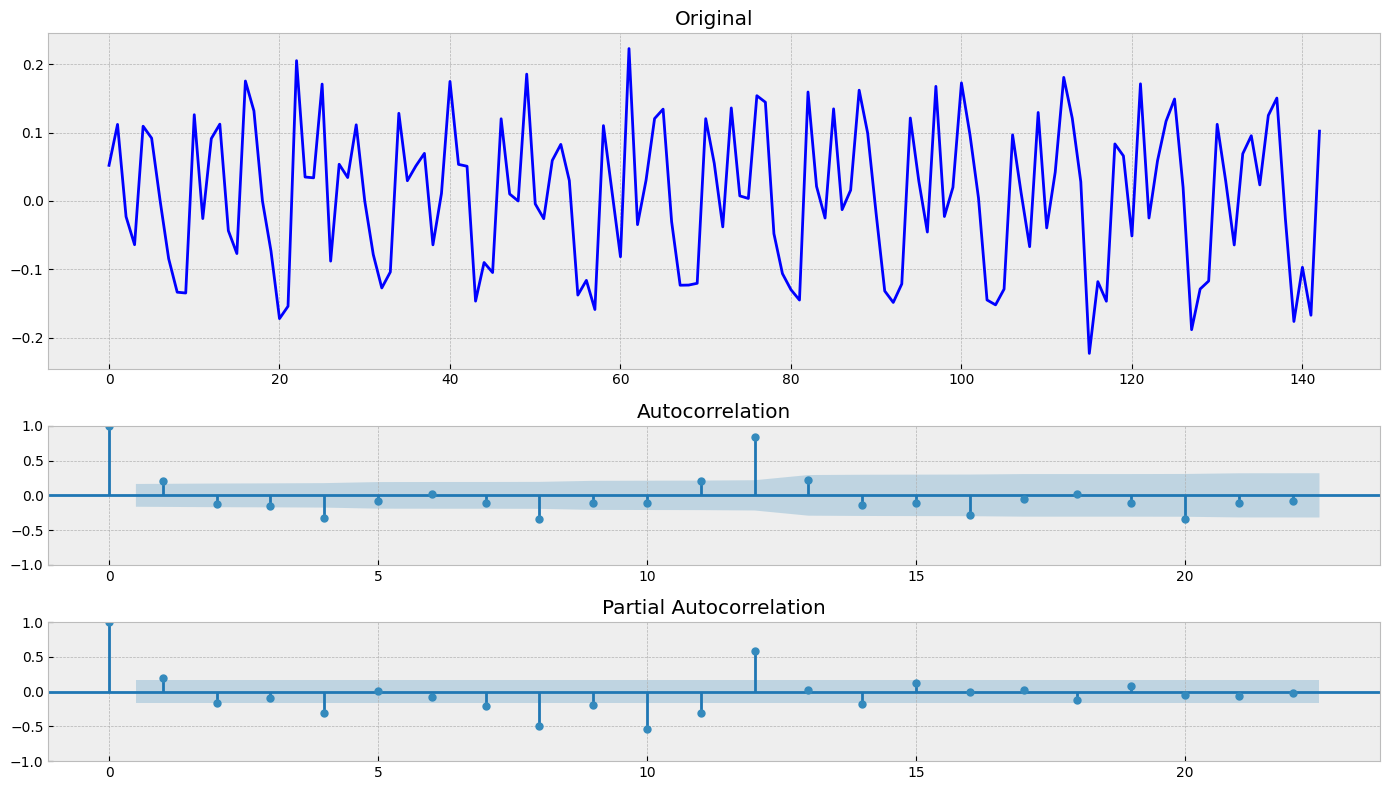

In [26]:
tsplot(series1)

In [15]:
#Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [27]:
series1 = series1[12:] - series1[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


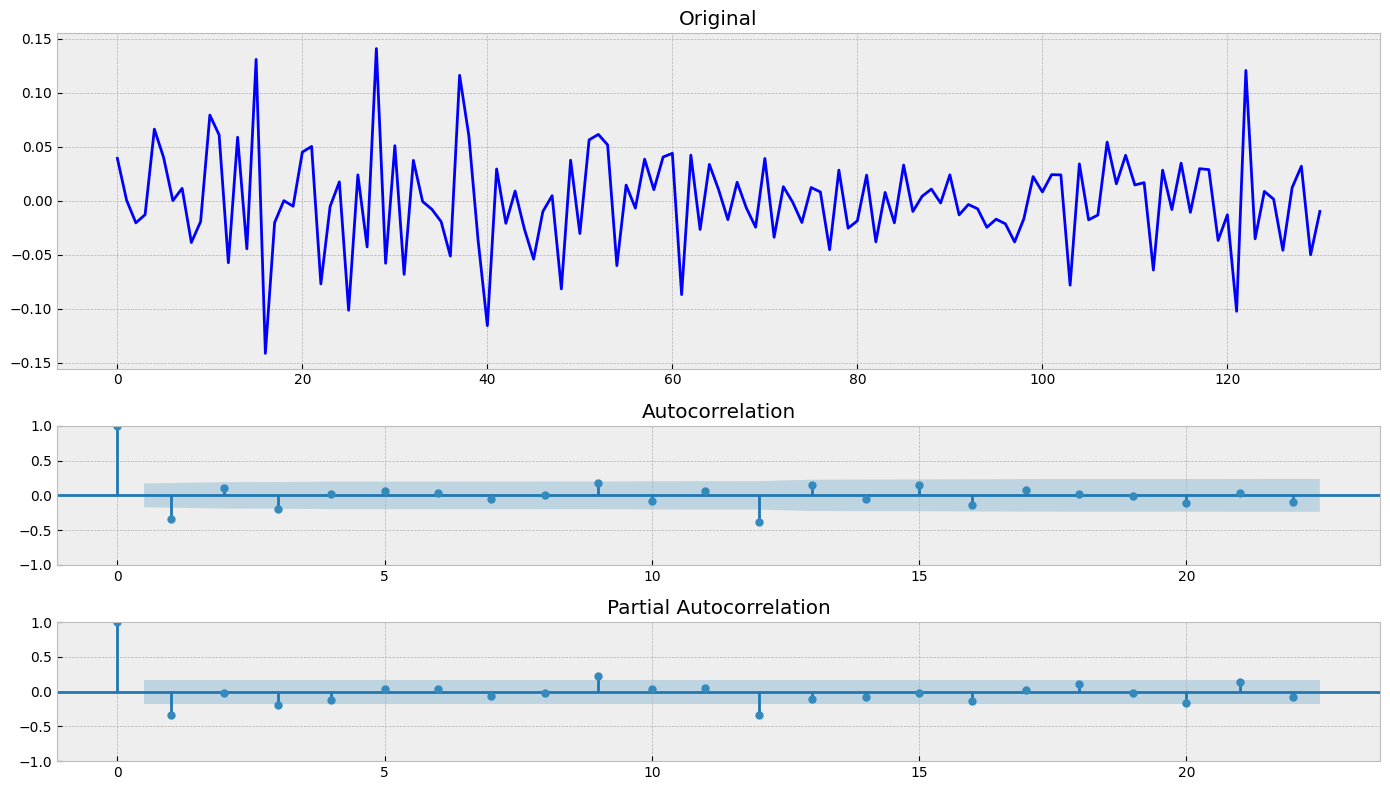

In [28]:
tsplot(series1)

In [29]:
#Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!
#Проведем анализ остальных временных рядов

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


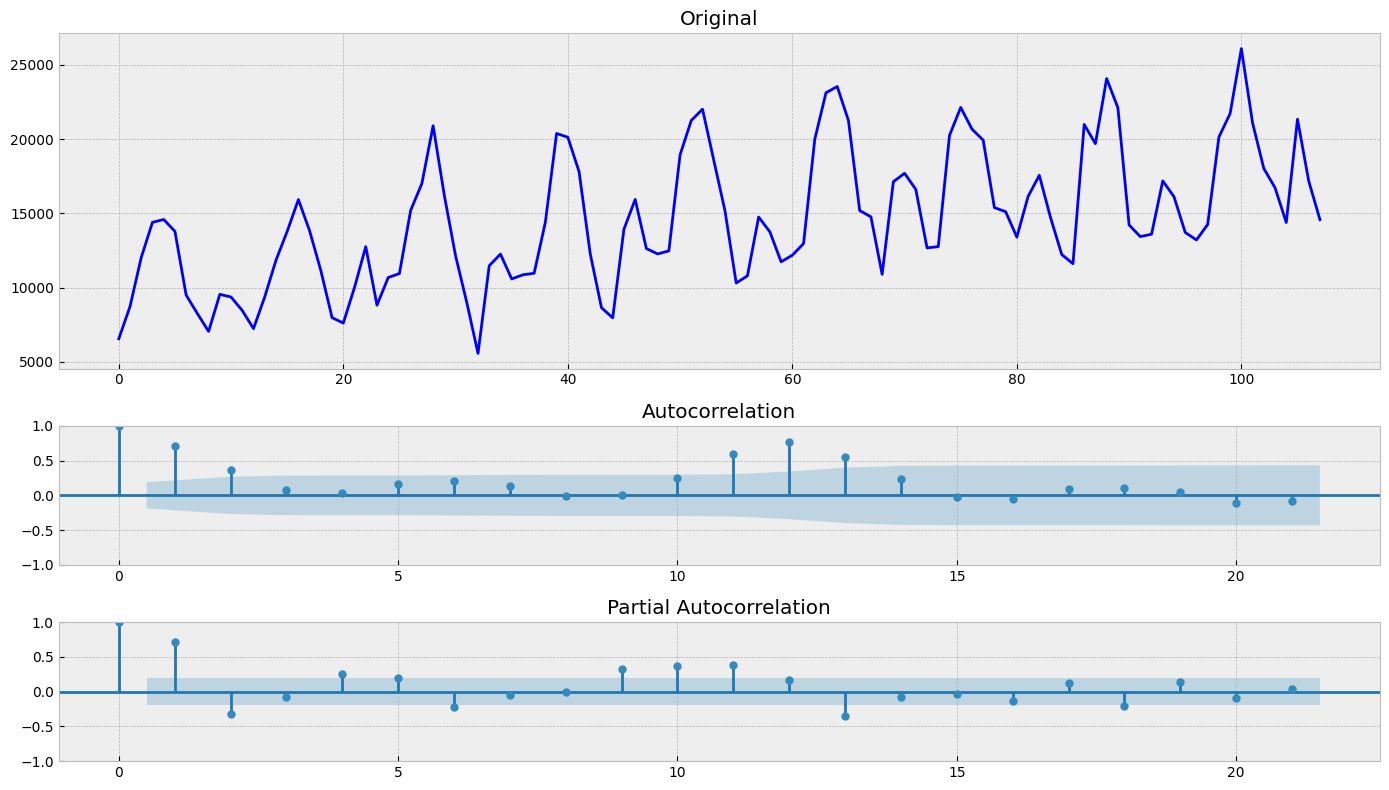

In [57]:
tsplot(series2) #Проведем исследования количества продаж автомобилей в Квебеке

Results of Dickey-Fuller Test:
Test Statistic                 -1.452425
p-value                         0.556901
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


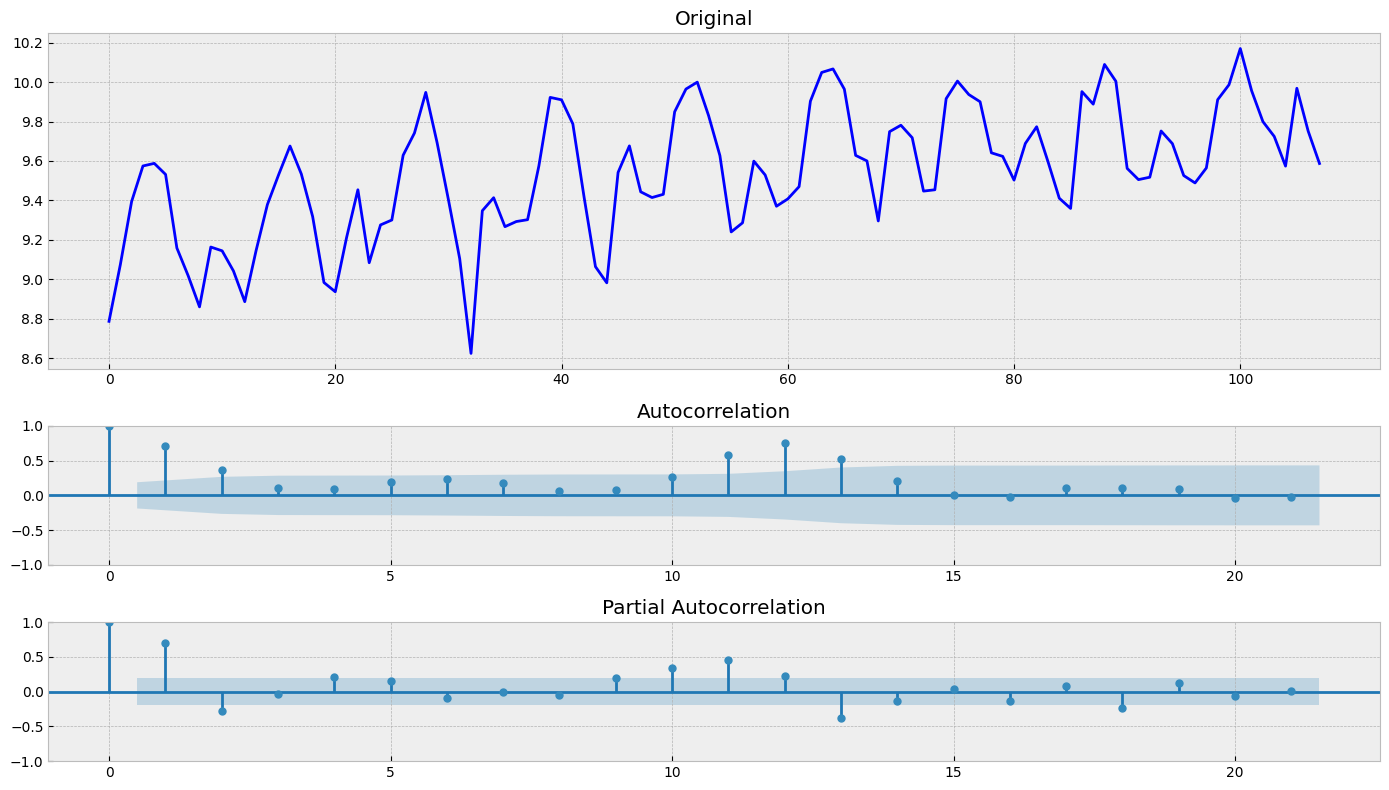

In [58]:
#уберем разброс дисперсию
series2 = boxcox(series2, 0)
tsplot(series2)

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


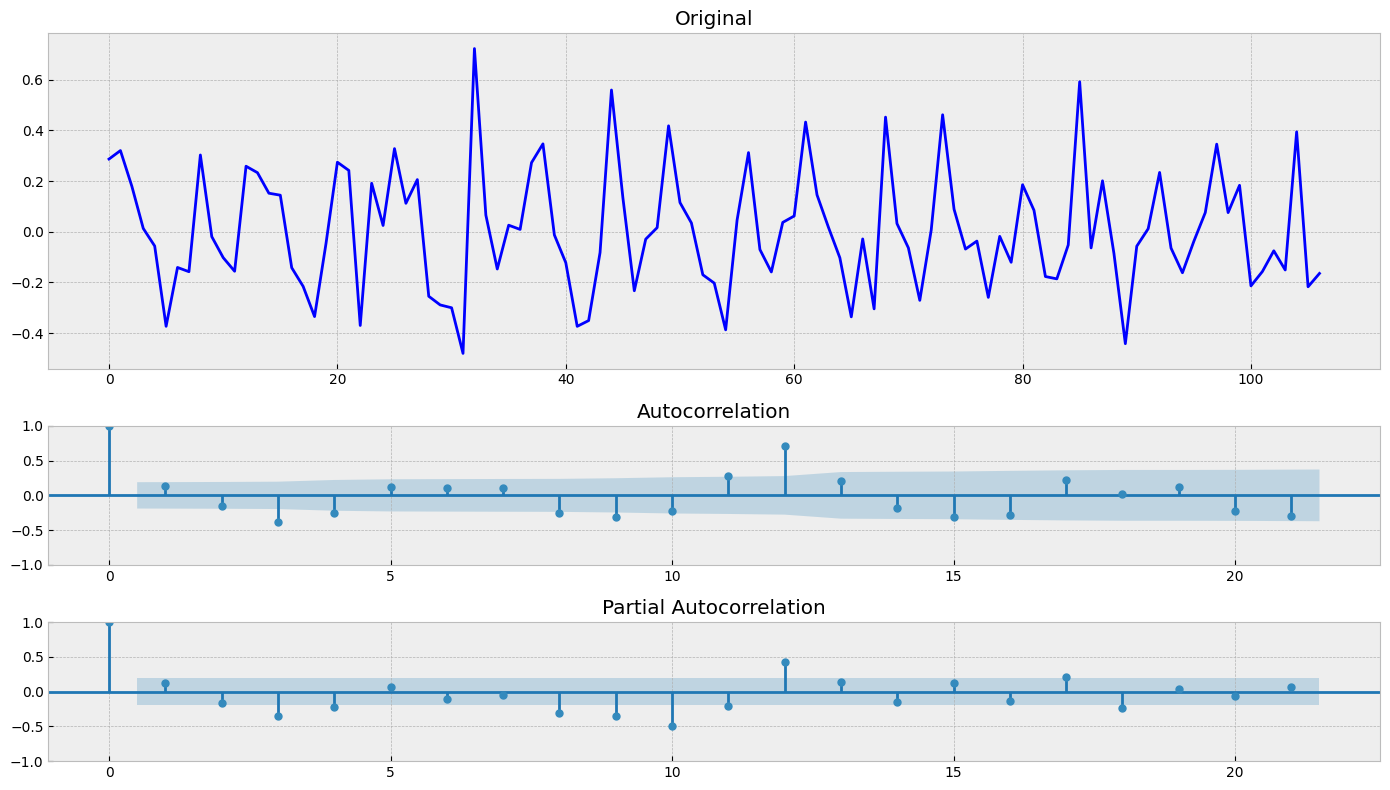

In [59]:
#уберем тренд путем диференцирования
series2 = np.diff(series2, 1)
tsplot(series2)

Results of Dickey-Fuller Test:
Test Statistic                -7.843066e+00
p-value                        5.866586e-12
#Lags Used                     8.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


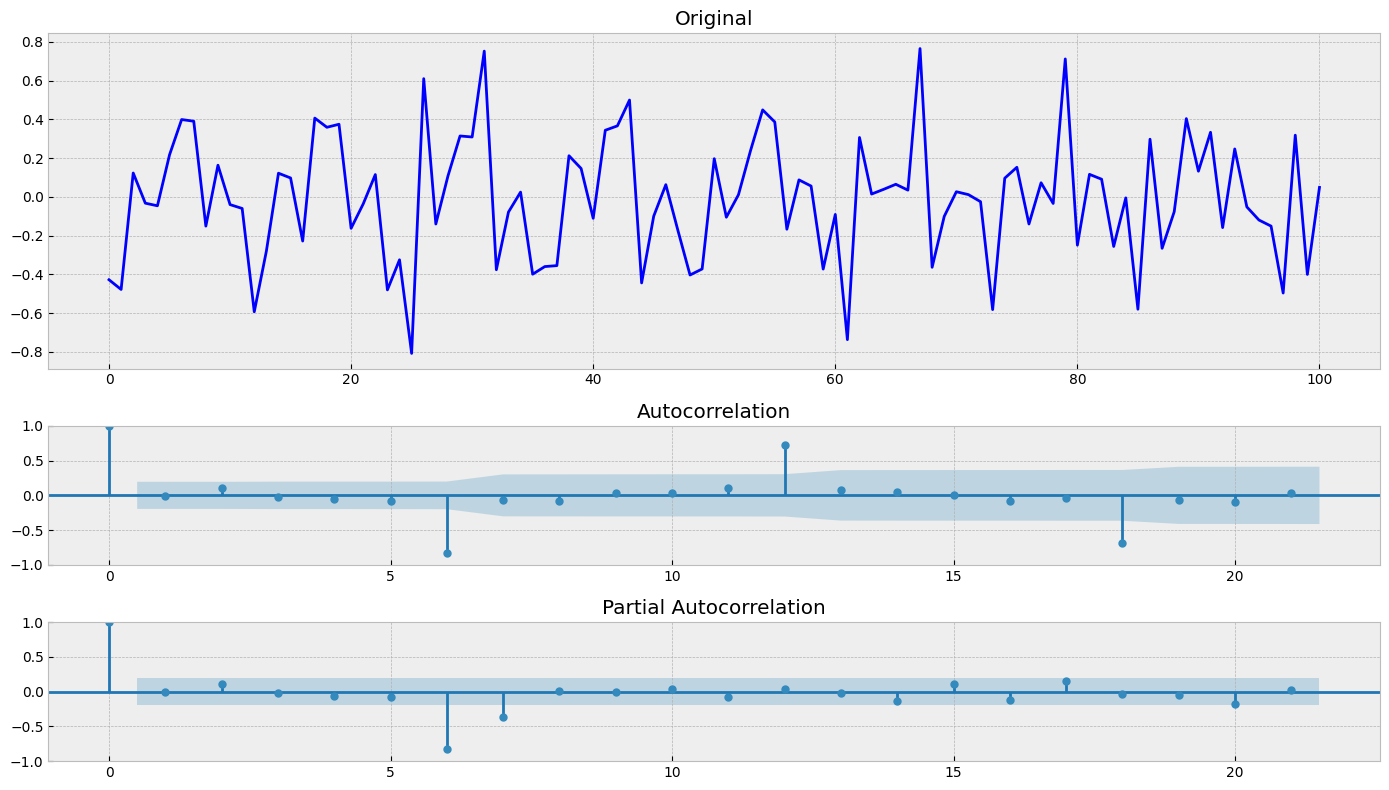

In [60]:
#уберем сезонность, которая судя по графикам равна 6 месяцев
series2 = series2[6:] - series2[:-6]
tsplot(series2)

In [61]:
#Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


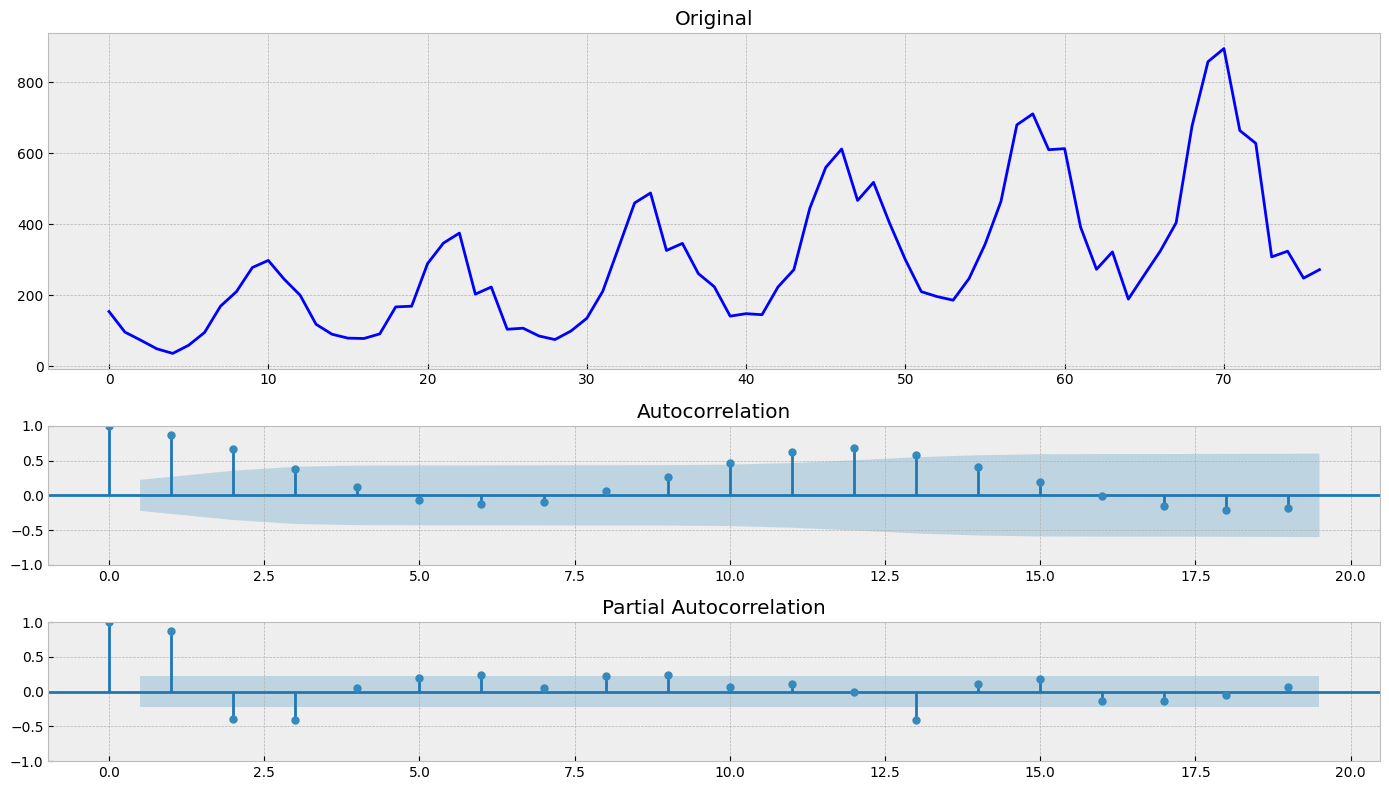

In [62]:
tsplot(series3) #Проведем исследования количества продаж какой-то компании

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


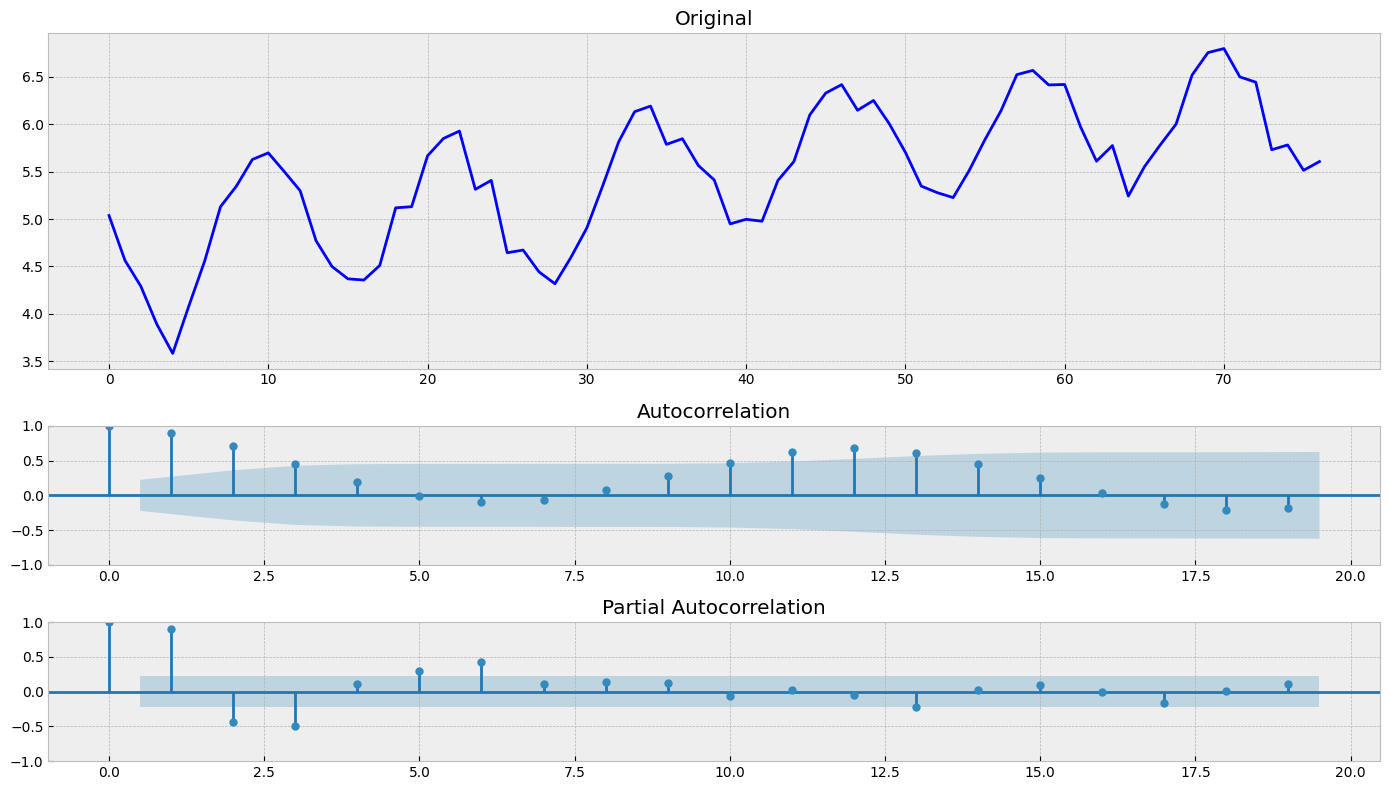

In [63]:
#уберем разброс дисперсию
series3 = boxcox(series3, 0)
tsplot(series3)

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


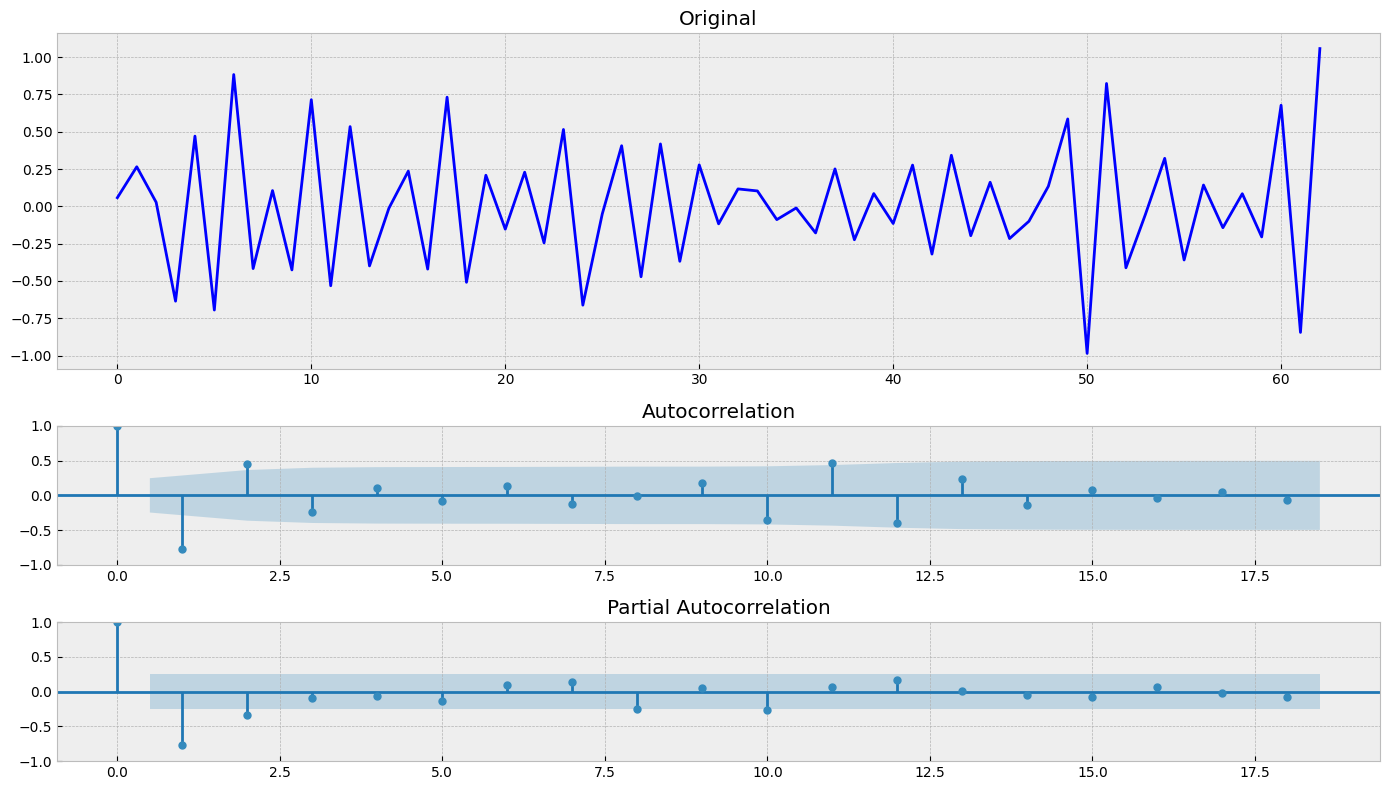

In [54]:
#уберем тренд путем диференцирования
series3 = np.diff(series3, 1)
tsplot(series3)

In [69]:
#Судя по p-value = 0.000006 ряд уже стационарный и делать с ним что либо уже не надо